# Heart Failure prediction

## Introduction
The aim of this document is to propose a solution to the heart failure prediction problem using Machine Learning tools. The data consists of thirteen clinical features, twelve of which correspond to possible predictors, and the last one is the target, i.e., a death event or no death event. The data can be found at the UCI repository: https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records 

The description of the clinical features is as follows:
- age: age of the patient (years) 
- anaemia: decrease of red blood cells or hemoglobin (boolean) 
- high blood pressure: if the patient has hypertension (boolean) 
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L) 
- diabetes: if the patient has diabetes (boolean) 
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage) 
- platelets: platelets in the blood (kiloplatelets/mL) 
- sex: woman or man (binary) 
- serum creatinine: level of serum creatinine in the blood (mg/dL) 
- serum sodium: level of serum sodium in the blood (mEq/L) 
- smoking: if the patient smokes or not (boolean) 
- time: follow-up period (days) 
- [target] death event: if the patient deceased during the follow-up period (boolean) 

For more information, please refer to Tables 1, 2, and 3 in the following paper:

Davide Chicco, Giuseppe Jurman: "Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone". BMC Medical Informatics and Decision Making 20, 16 (2020).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import matplotlib.patches as mpatches
import warnings
from scipy.stats import ks_2samp
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

## Load data

In [2]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
binary_variables = []
continuous_variables = []
for col in data.columns[:-1]:
    if data[col].nunique() == 2:
        binary_variables.append(col)
    else:
        continuous_variables.append(col)

In [4]:
binary_variables, continuous_variables

(['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'],
 ['age',
  'creatinine_phosphokinase',
  'ejection_fraction',
  'platelets',
  'serum_creatinine',
  'serum_sodium',
  'time'])

## Explotatory Analysis
### Continuous variables
#### Pairgrid plot by Death events

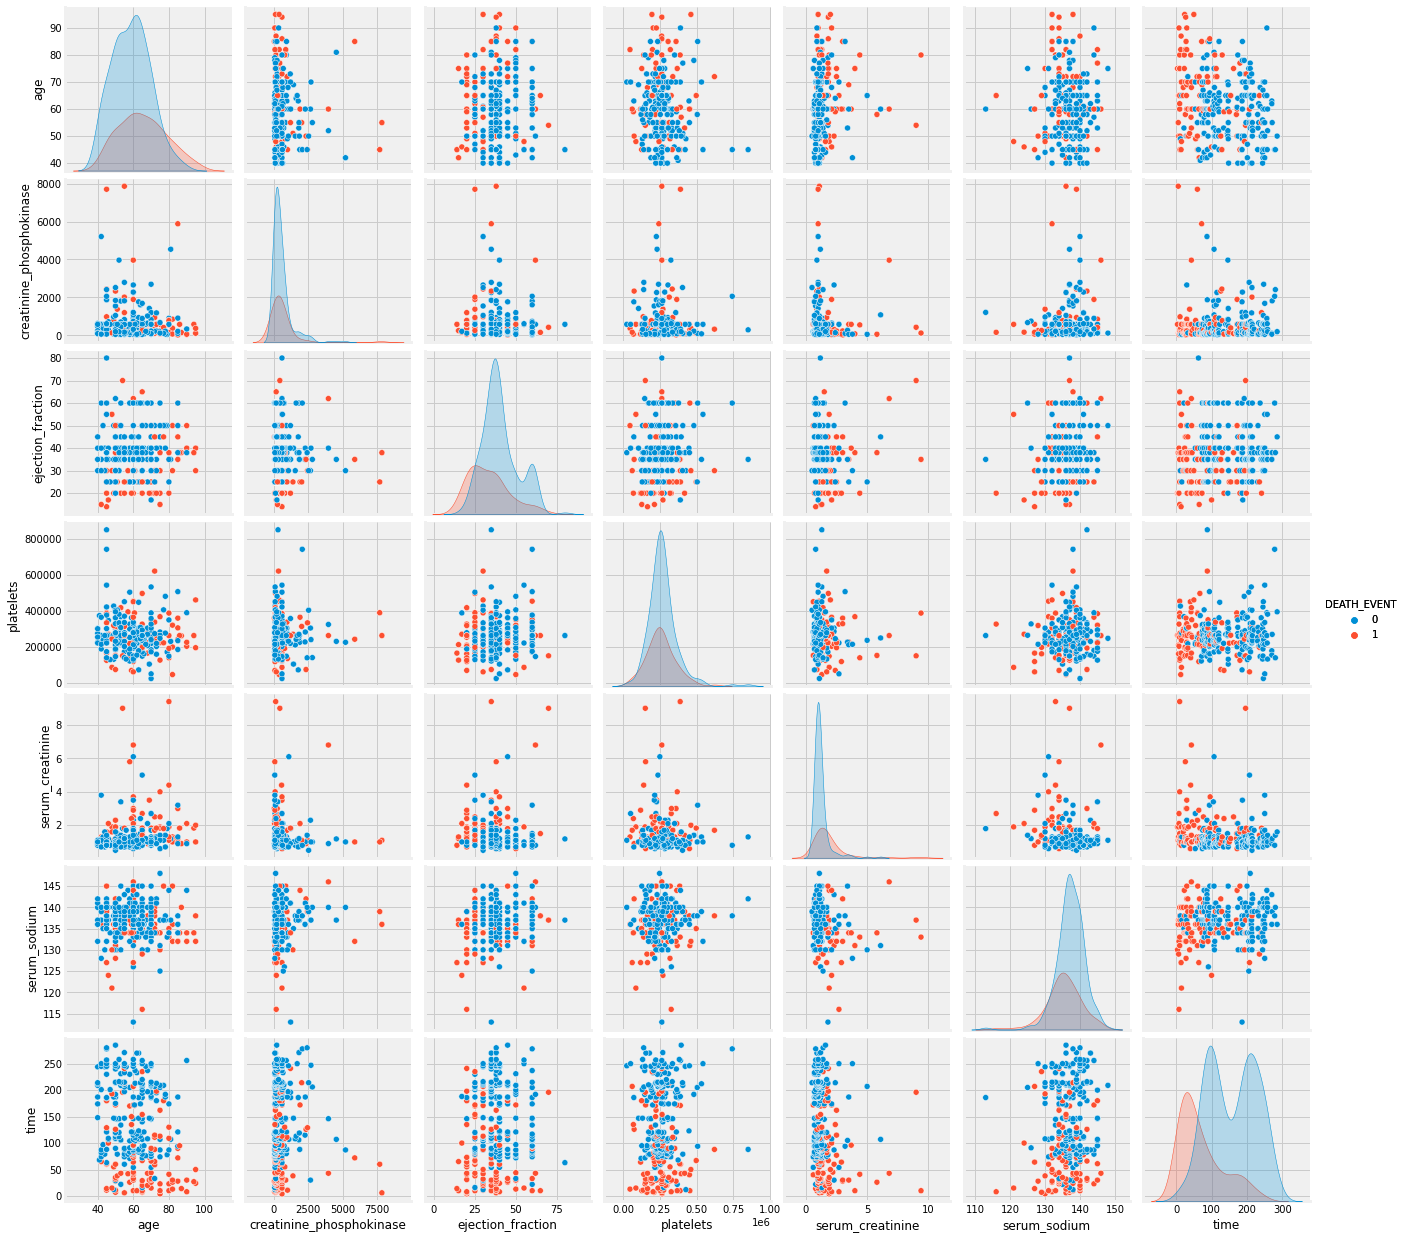

In [5]:
g = sns.pairplot(data[continuous_variables+['DEATH_EVENT']], hue="DEATH_EVENT")
g.map_offdiag(sns.scatterplot)
g.add_legend();

The figure above provides information about the relationship between each pair of continuous variables and also about the relationship between each predictor and the target value, 'Death event'.

Overall, the scatter plots in all cases do not show a clear pattern; for instance, no linear shapes are evident. This suggests weak Pearson correlations between the variables. However, it is recommended to calculate the Pearson coefficient to verify what is observed with the naked eye.

It is evident that the distribution of each predictor differs between the 'Death event' data and the 'No death event' data. The greater the difference in the distribution of a variable between 'Death' and 'No death' events, the better predictor that variable will be. A closer examination of the plot diagonal is presented below.

In [6]:
def plot_contiuous_var(variable):
    fig, ax = plt.subplots(1,2, figsize=(14,4))
    fig.suptitle(variable.replace('_',' ').capitalize()+' distribution by death event')
    sns.histplot(data=data, x=variable, hue='DEATH_EVENT', bins=15, kde=True, ax=ax[0], legend=False)
    ax[0].set_title('Frecuency')
    sns.distplot(data[data.DEATH_EVENT==0][variable], bins=15, kde='hist', ax=ax[1])
    sns.distplot(data[data.DEATH_EVENT==1][variable], bins=15, kde='hist', ax=ax[1])
    ax[1].set_title('Normalized by group')
    plt.figlegend( labels=['Death event','No death event'], loc = 'lower center', ncol=2, labelspacing=0. );

#### Age

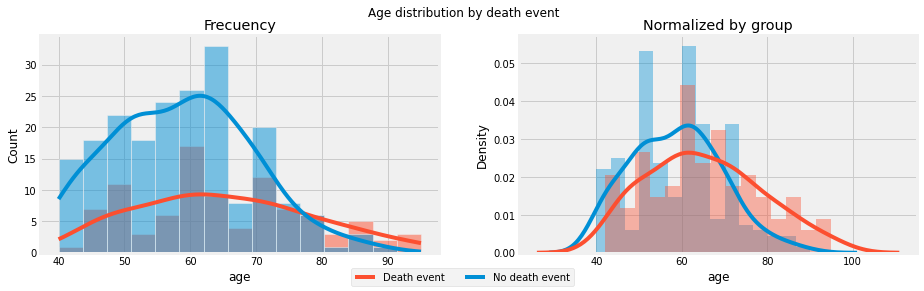

In [7]:
plot_contiuous_var('age')

#### Creatinine phosphokinase

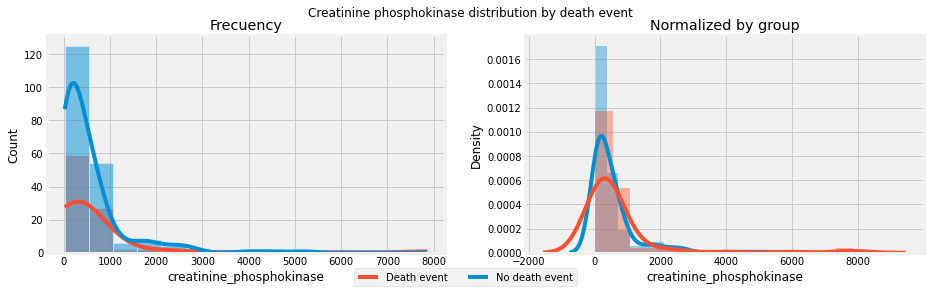

In [8]:
plot_contiuous_var('creatinine_phosphokinase')

#### Ejection Fraction

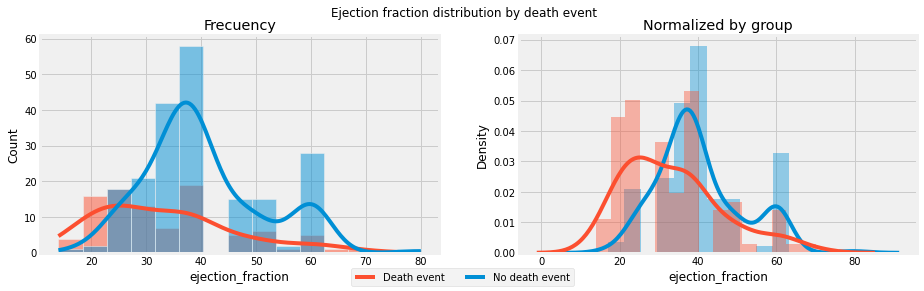

In [9]:
plot_contiuous_var('ejection_fraction')

#### Platelets

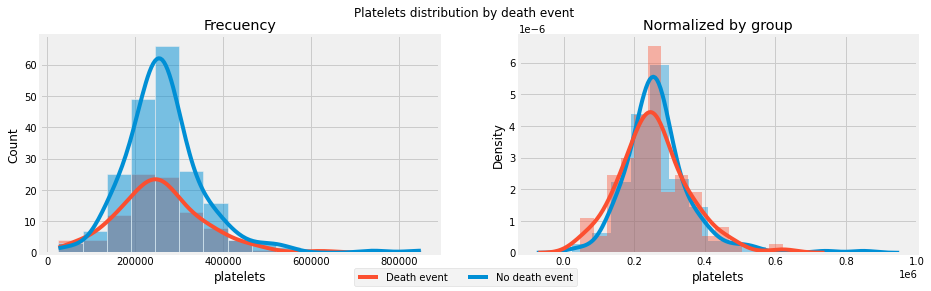

In [10]:
plot_contiuous_var('platelets')

#### Serum creatinine

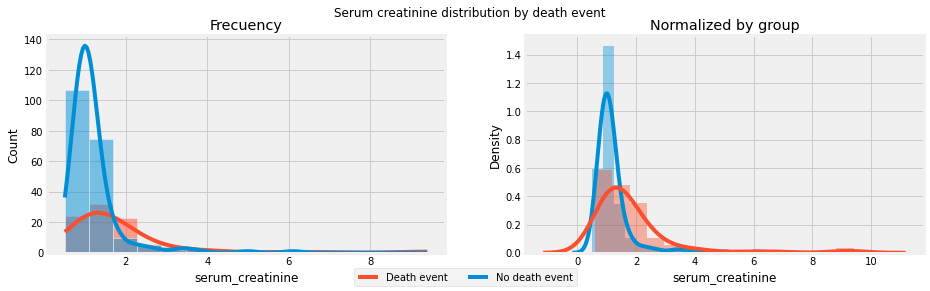

In [11]:
plot_contiuous_var('serum_creatinine')

#### Serum sodium

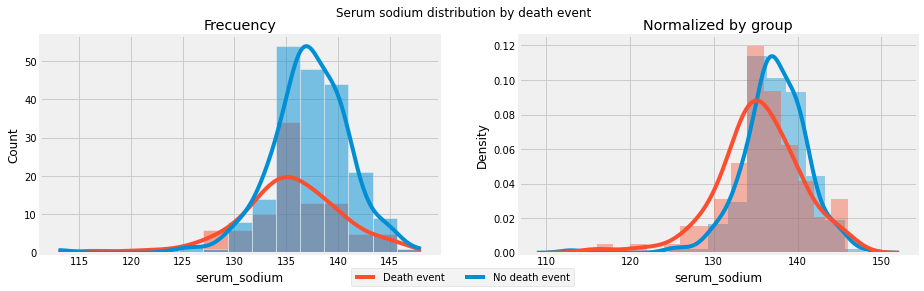

In [12]:
plot_contiuous_var('serum_sodium')

#### Time

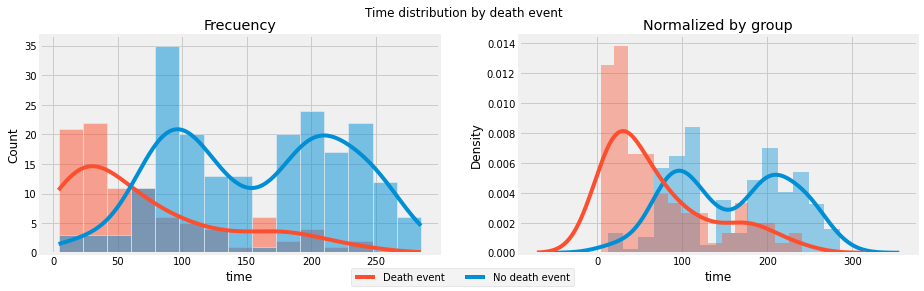

In [13]:
plot_contiuous_var('time')

In summary, there are clear differences in the distribution between 'Death event' and 'No death event' for the following variables:

* Ejection Fraction
* Age
* Time
* Serum creatinine
* Serum sodium

Conversely, Platelets, Creatinine phosphokinase and Serum sodium do not exhibit significant differences between the distributions of 'Death' and 'No death' events.
To confirm this observation, both visual inspection and statistical testing, such as the Kolmogorov-Smirnov test, can be applied as follows.

#### K-S test 

In [14]:
for var in continuous_variables:
    statistic, p_value = ks_2samp(data.loc[data.DEATH_EVENT==0, var], data.loc[data.DEATH_EVENT==1, var])
    print('{} \nStatistic: {}\t p-value: {}\n'.format(var.capitalize().replace('_',' '), statistic, p_value))

Age 
Statistic: 0.22567733990147784	 p-value: 0.002087643655087384

Creatinine phosphokinase 
Statistic: 0.10047208538587848	 p-value: 0.4868783804521374

Ejection fraction 
Statistic: 0.32435344827586204	 p-value: 1.3600946608183232e-06

Platelets 
Statistic: 0.10729679802955665	 p-value: 0.4050465848360223

Serum creatinine 
Statistic: 0.3508312807881773	 p-value: 1.1924781248027815e-07

Serum sodium 
Statistic: 0.24876847290640394	 p-value: 0.0004796317624980499

Time 
Statistic: 0.5922105911330049	 p-value: 7.313271516617559e-22



The null hypothesis in the Kolmogorov-Smirnov test is that the distributions of both samples are the same. The lower the p-value, the stronger the statistical evidence to reject the null hypothesis. In this case, the p-value is compared to a significance level of 0.05. Therefore, if the p-value is less than 0.05, it indicates that the distributions between 'Death' and 'No death' events are different.

According to the results of the Kolmogorov-Smirnov test, the continuous variables that show different distributions between 'Death' and 'No death' events are:


* Time
* Serum Creatinine
* Ejection Fraction
* Serum Sodium
* Age

### Categorical variables

In [15]:
def plot_categorical_variable(feature, condition=' condition'):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
    plt.subplot(1, 2, 2)
    total = data.groupby(feature)[['DEATH_EVENT']].count().reset_index()
    death = data[data['DEATH_EVENT']==1].groupby(feature)[['DEATH_EVENT']].count().reset_index()
    death['DEATH_EVENT'] = [i / j * 100 for i,j in zip(death['DEATH_EVENT'], total['DEATH_EVENT'])]
    total['DEATH_EVENT'] = [i / j * 100 for i,j in zip(total['DEATH_EVENT'], total['DEATH_EVENT'])]
    bar1 = sns.barplot(x=str(feature), y="DEATH_EVENT", data=total, color='#3c8ecf')
    n = death['DEATH_EVENT']/(total['DEATH_EVENT'])*100
    counter_=0
    for p in bar1.patches:
        width = p.get_width()
        x, y = p.get_xy() 
        bar1.annotate(f'{n[counter_]:.2f}%', (x + width/2, y+n[counter_]/2), ha='center')
        counter_+=1
    bar2 = sns.barplot(x=str(feature), y="DEATH_EVENT", data=death, color='#ea5c3f')
    counter_=0
    for p in bar2.patches:
        width = p.get_width()
        x, y = p.get_xy() 
        if counter_ <=1:
            bar2.annotate(f'{100-n[counter_]:.2f}%', (x + width/2, (100 - n[counter_])/2+n[counter_]), ha='center')
            counter_+=1
    top_bar = mpatches.Patch(color='#3c8ecf', label='No death event')
    bottom_bar = mpatches.Patch(color='#ea5c3f', label='Death event')
    plt.legend(handles=[top_bar, bottom_bar])
    plt.ylabel('Percentage')
    plt.xlabel(feature.capitalize().replace('_',' '))
    plt.xticks([0,1], ['No','Yes'])
    if feature == 'sex':
        plt.xticks([0,1], ['Woman','Man'])
    plt.title('Proportion of death events by '+feature.capitalize().replace('_',' ')+condition);

    plt.subplot(1, 2, 1)
    total = data.groupby(feature)[['DEATH_EVENT']].count().reset_index()
    death = data[data['DEATH_EVENT']==1].groupby(feature)[['DEATH_EVENT']].count().reset_index()
    bar1 = sns.barplot(x=str(feature), y="DEATH_EVENT", data=total, color='#3c8ecf')
    n = death['DEATH_EVENT']
    counter_=0
    for p in bar1.patches:
        width = p.get_width()
        x, y = p.get_xy() 
        bar1.annotate(f'{n[counter_]:.0f}', (x + width/2, y+n[counter_]/2), ha='center')
        counter_+=1
    bar2 = sns.barplot(x=str(feature), y="DEATH_EVENT", data=death, color='#ea5c3f')
    counter_=0
    for p in bar2.patches:
        width = p.get_width()
        x, y = p.get_xy() 
        if counter_ <=1:
            t = total.loc[counter_,'DEATH_EVENT']
            bar2.annotate(f'{t-n[counter_]:.0f}', (x + width/2, (t - n[counter_])/2+n[counter_]), ha='center')
            counter_+=1
    top_bar = mpatches.Patch(color='#3c8ecf', label='No death event')
    bottom_bar = mpatches.Patch(color='#ea5c3f', label='Death event')
    plt.legend(handles=[top_bar, bottom_bar])
    plt.ylabel('Frecuency')
    plt.xlabel(feature.capitalize().replace('_',' '))
    plt.xticks([0,1], ['No','Yes'])
    if feature == 'sex':
        plt.xticks([0,1], ['Woman','Man'])
    plt.title('Count of death events by '+feature.capitalize().replace('_',' ')+condition)
plt.show()

#### Anaemia

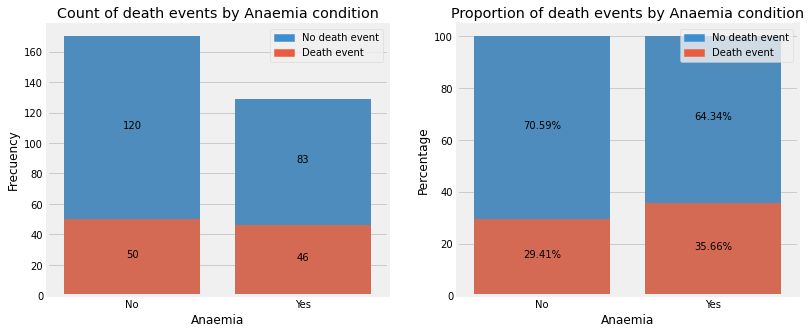

In [16]:
plot_categorical_variable('anaemia')

#### Diabetes

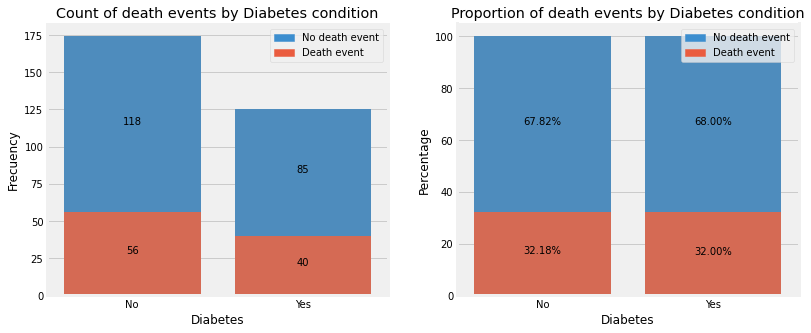

In [17]:
plot_categorical_variable('diabetes')

#### High blood pressure 

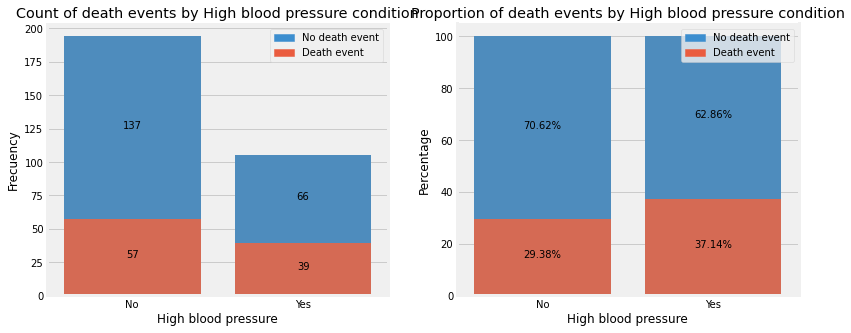

In [18]:
plot_categorical_variable('high_blood_pressure')

#### Sex

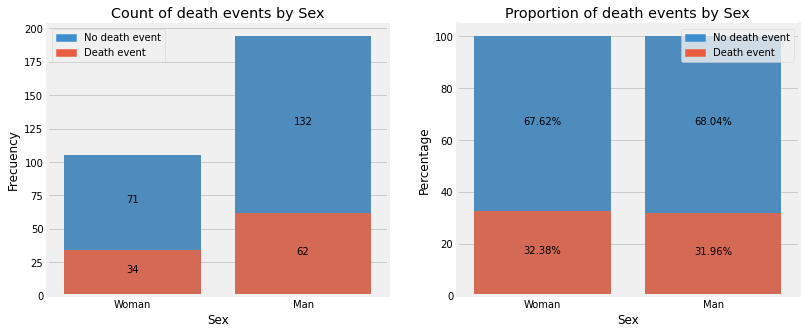

In [19]:
plot_categorical_variable('sex','')

#### Smoking

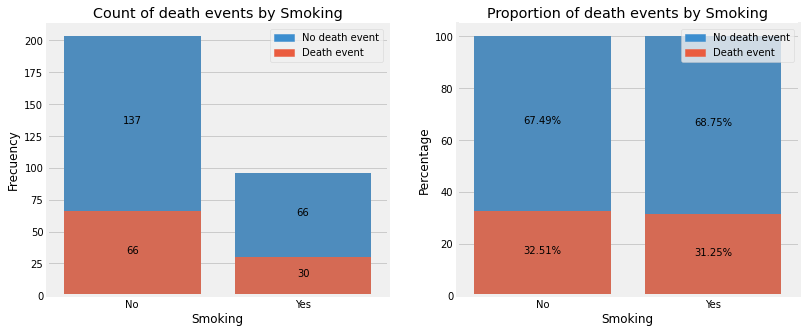

In [20]:
plot_categorical_variable('smoking','')

It can be clearly seen that there are no significant differences between the proportions of 'Death' and 'No death' event patients with or without diabetes. Similarly, there are no noticeable differences between the percentages of deceased patients in the female and male groups; therefore, sex may not be a significant variable for predicting heart failure. Another variable exhibiting a similar pattern is smoking, where no evident difference between smokers and non-smokers is observed, as the death rates are nearly the same in both groups.

Conversely, a difference is observed in the case of anemia, as patients who have this disorder also have a higher rate of 'Death' events compared to healthy individuals. Additionally, regarding high blood pressure, it is evident that patients with this condition also experience higher rates of 'Death' events compared to those who do not have it. Hence, anemia and high blood pressure are the only two categorical variables to be considered for predicting heart failure

### Pearson correlations

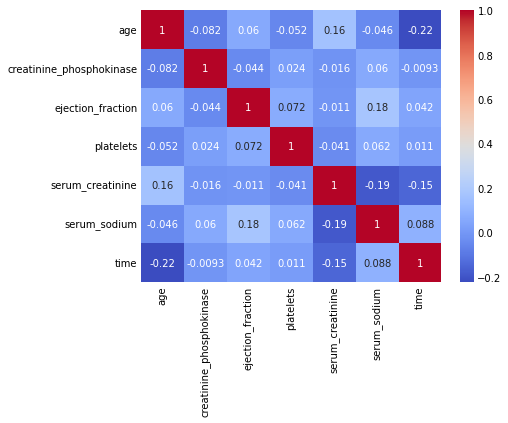

In [21]:
plt.figure(figsize=(6,5))
sns.heatmap(data[continuous_variables].corr(), annot = True, cmap = 'coolwarm');

The heatmap above illustrates the Pearson correlation coefficients between each continuous variable. No strong linear correlations are observed. The highest coefficient is -0.22, which relates to the time and age variables. However, it is still quite low, especially when considering that the minimum and maximum absolute values are 0 and 1.

### Target: Death events

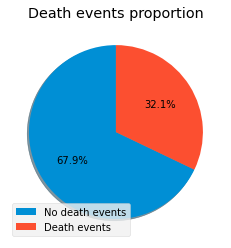

In [22]:
plt.rcParams['figure.facecolor'] = 'white'
labels = ['No death events','Death events']
plt.pie(data['DEATH_EVENT'].value_counts(normalize=True), autopct='%1.1f%%', shadow=True, startangle=90);
plt.legend(labels)
plt.title('Death events proportion')
plt.show();

In [23]:
data['DEATH_EVENT'].value_counts(normalize=True)

DEATH_EVENT
0    0.67893
1    0.32107
Name: proportion, dtype: float64

The figure provides information about the proportion of the target variable in the dataset, specifically illustrating its imbalance with 32% 'Dead' events and 67% 'No dead' events.

## Machine Learning approach
## Feature selection
### Select KBest

The SelectKBest method scores the variables based on chi-squared, f-classification, f-regression, and mutual information classification statistics, and selects the best ones to predict heart failure. However, it is necessary to apply this test separately for continuous and categorical data because the chi-squared test is suitable only for categorical data. For continuous data, the f-classification score function can be applied.
#### Continuous variables

In [24]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [25]:
y = data.DEATH_EVENT
cont_selector = SelectKBest(f_classif, k=2) 
#The value of k is arbitrary, in this case Select KBest is used to get scores, not an specific number of features.
cont_selector.fit(data[continuous_variables], y)

cont_ranks = pd.DataFrame(dict(zip(continuous_variables, cont_selector.scores_)), index=['Scores']).T
cont_ranks['Support'] = cont_selector.get_support()
cont_ranks.sort_values('Scores', ascending=False, inplace=True)
cont_ranks

,Scores,Support
time,114.181264,True
serum_creatinine,28.158492,True
ejection_fraction,23.094063,False
age,20.435946,False
serum_sodium,11.765331,False
creatinine_phosphokinase,1.173259,False
platelets,0.718880,False


#### Categorical variables

In [26]:
cat_selector = SelectKBest(f_classif, k=2) 
#The value of k is arbitrary, in this case Select KBest is used to get scores, not an specific number of features.
cat_selector.fit(data[binary_variables], y)

cat_ranks = pd.DataFrame(dict(zip(binary_variables, cat_selector.scores_)), index=['Scores']).T
cat_ranks['Support'] = cat_selector.get_support()
cat_ranks.sort_values('Scores', ascending=False, inplace=True)
cat_ranks

,Scores,Support
high_blood_pressure,1.881937,True
anaemia,1.310096,True
smoking,0.047333,False
sex,0.005534,False
diabetes,0.001121,False


On the one hand, it is undoubtedly clear that among categorical variables, only **High Blood Pressure** and **Anaemia** can be useful for predicting heart failure.

On the other hand, the continuous variables with the highest scores are **Time**, **Serum Creatinine**, **Ejection Fraction**, **Age** and **Serum Sodium**. Notably, these results agree with what was previously obtained in the exploratory analysis.

In [27]:
candidate_variables = cont_ranks.index.tolist()[:5] + cat_ranks.index.tolist()[:2]
candidate_variables

['time',
 'serum_creatinine',
 'ejection_fraction',
 'age',
 'serum_sodium',
 'high_blood_pressure',
 'anaemia']

### Models

Various classifiers are trained to select the best predictor for the target variable, 'Heart Failure.' The data is initially split into 80% for training the model and 20% for testing. Cross-validation is applied during the training phase to prevent overfitting.

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = data[candidate_variables]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

#### Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, classification_report, plot_roc_curve, plot_confusion_matrix

The hyperparameters of the Decision Tree are determined using Grid Search cross-validation. In other words, models are trained using the parameter combinations specified in the 'params' variable, and the best parameters are those that maximize the scoring method (e.g., Balanced Accuracy, ROC_AUC score, and F1 score).

In this case, the data is imbalanced. Therefore, scoring methods like Balanced Accuracy and F1 Micro are more suitable than ROC Area under the curve. However, the 'class weight' parameter can be used to assign more weight to the minority class (1: Death event) and then apply the ROC_AUC scoring method or another suitable one for balanced data.

##### DTC ROC_AUC 1

In [31]:
%%time
dtc = DecisionTreeClassifier(random_state=0)
params = {'max_depth':[4,5,6,7,8,9,10], 'min_samples_split':[2,3,4,5,6], 
          'max_features':['sqrt','log2', 6, 7], 'class_weight':['balanced',None]}
dtc_cv = GridSearchCV(dtc, params, scoring='roc_auc', cv=10).fit(X_train, y_train)

#TRAIN
print(dtc_cv.best_params_)
print(20*'=','TRAINING METRICS',20*'=')
dtc_cv = dtc_cv.best_estimator_
y_pred = dtc_cv.predict(X_train)
print(classification_report(y_train, y_pred))
print(20*'=','TESTING METRICS',20*'=')
y_pred_test = dtc_cv.predict(X_test)
print(classification_report(y_test, y_pred_test))

{'class_weight': None, 'max_depth': 4, 'max_features': 6, 'min_samples_split': 6}
==================== TRAINING METRICS ====================
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       159
           1       0.79      0.86      0.83        80

    accuracy                           0.88       239
   macro avg       0.86      0.87      0.87       239
weighted avg       0.88      0.88      0.88       239

==================== TESTING METRICS ====================
              precision    recall  f1-score   support

           0       0.97      0.82      0.89        44
           1       0.65      0.94      0.77        16

    accuracy                           0.85        60
   macro avg       0.81      0.88      0.83        60
weighted avg       0.89      0.85      0.86        60

CPU times: user 10.9 s, sys: 39.3 ms, total: 11 s
Wall time: 11 s


There is a distinction in the metrics for each class (0: No death event; 1: Death event). Naturally, the f1-score is higher for the majority class; however, the difference between the metrics in the training set and the testing set is more significant for the minority class. Specifically, it achieves an 83% f1-score (the harmonic mean of recall and precision) in the training set, but only 77% in the testing set. For this reason, alternative combinations of hyperparameters are being tuned.

##### DTC ROC_AUC 2

In [32]:
%%time
dtc = DecisionTreeClassifier(random_state=0)
params = {'max_depth':[3,4,5,6,7,8,9,10], 'min_samples_split':[2,3,4,5,6,7,8,9], 
          'max_features':['sqrt','log2', 6, 7], 'class_weight':['balanced',None]}
dtc_cv = GridSearchCV(dtc, params, scoring='roc_auc', cv=10).fit(X_train, y_train)

print(dtc_cv.best_params_)
print(20*'=','TRAINING METRICS',20*'=')
dtc_cv = dtc_cv.best_estimator_
y_pred = dtc_cv.predict(X_train)
print(classification_report(y_train, y_pred))
print(20*'=','TESTING METRICS',20*'=')
y_pred_test = dtc_cv.predict(X_test)
print(classification_report(y_test, y_pred_test))

{'class_weight': None, 'max_depth': 3, 'max_features': 7, 'min_samples_split': 9}
==================== TRAINING METRICS ====================
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       159
           1       0.80      0.82      0.81        80

    accuracy                           0.87       239
   macro avg       0.86      0.86      0.86       239
weighted avg       0.88      0.87      0.87       239

==================== TESTING METRICS ====================
              precision    recall  f1-score   support

           0       0.97      0.84      0.90        44
           1       0.68      0.94      0.79        16

    accuracy                           0.87        60
   macro avg       0.83      0.89      0.85        60
weighted avg       0.90      0.87      0.87        60

CPU times: user 17.8 s, sys: 44.4 ms, total: 17.8 s
Wall time: 17.9 s


It is evident that the metrics for both classes with this Decision Tree model do not show a significant gap between training and testing. Therefore, this model appears to be useful for predicting new cases of heart failure.

In this case, it is important to prioritize recall over precision, a consideration that certainly applies to a large number of healthcare models. Regarding this, False Negative cases are more concerning than False Positive ones. In the former, a person might receive a diagnosis of 'No death event' when they are actually at risk of heart failure, which is worse than predicting a 'Death event' when it will not occur. This approach is applicable in this case; however, the decision regarding what is more critical depends on the problem and how the model will be used. Therefore, it can vary according to these factors and the specifics of the application.

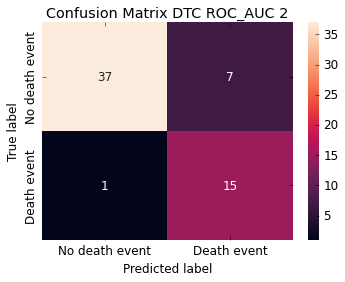

In [33]:
plt.figure(figsize=(5,4))
plt.style.use('classic')
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, yticklabels=['No death event','Death event'], xticklabels=['No death event','Death event'])
plt.xlabel('Predicted label')
plt.ylabel('True label');
plt.title('Confusion Matrix DTC ROC_AUC 2');

* 37 cases are predicted correctly as No death events
* 15 cases are predicted correctly as Death events
* 7 cases are predicted wrongly as Death event when it is not going to happen (False Positive).
* 1 case is predicted wrongly as No death event when a heart failure is going to take place (False Negative).

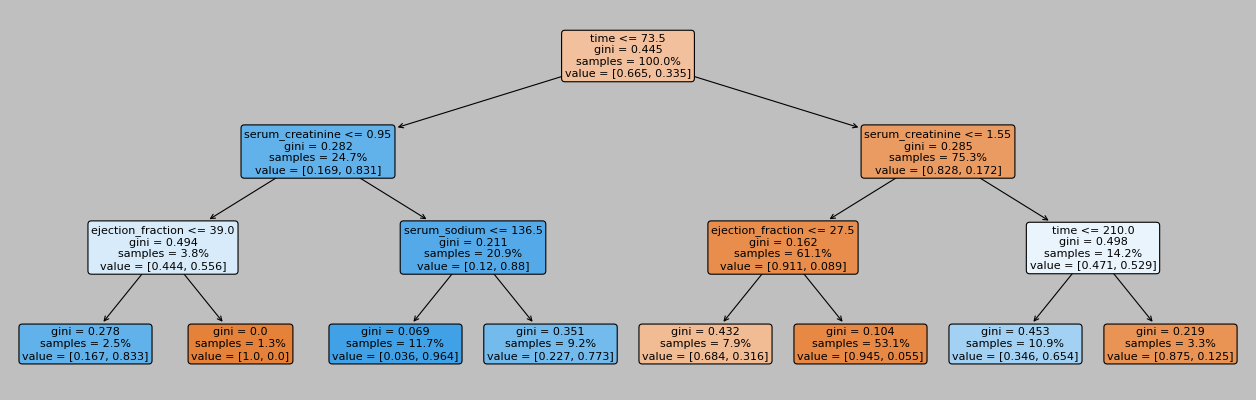

In [34]:
plt.figure(figsize=(20,6))
tree.plot_tree(dtc_cv, filled=True, rounded=True, feature_names=X_train.columns.tolist(), proportion=True);

Notably, this Decision Tree includes, in the first levels, the variables **Time**, **Serum creatinine**, and **Ejection fraction**. These were the three top variables selected previously through Select KBest (f test).

The nodes with a Gini coefficient of 0 have perfect separation between both classes. This means that the lower the Gini coefficient, the better the classification, as the node's Gini coefficient indicates the dispersion within it. As a result, a weighted Gini is calculated using the samples' percentage of each node as its weight

In [35]:
print('Weighted gini: {:.2f}'.format(0.278*2.5 + 0.069*11.7 + 0.351*9.2 + 0.432*7.9 + 0.104*53.1 + 0.453* 10.9 + 0.219*3.3))

Weighted gini: 19.33


In [36]:
pd.DataFrame(zip(X_train.columns, dtc_cv.feature_importances_), columns=['Feature','Importance']).sort_values('Importance', ascending=False)

,Feature,Importance
0,time,0.696992
1,serum_creatinine,0.204476
2,ejection_fraction,0.083504
4,serum_sodium,0.015028
3,age,0.000000
5,high_blood_pressure,0.000000
6,anaemia,0.000000


Remarkably, only four variables are utilized in this model, with one feature accounting for nearly 70% of the total importance. Ideally, the importance would be more evenly distributed. Other models were trained to explore additional options.

##### DTC Balanced Accuracy

In [37]:
%%time
dtc = DecisionTreeClassifier(random_state=0)
params = {'max_depth':[3,4,5,6,7,8,9,10], 'min_samples_split':[2,3,4,5,6,7,8,9], 
          'max_features':['log2',6,7], 'class_weight':['balanced',{0:44,1:56}, {0:45,1:55}, {0:43,1:57}]}
dtc_cv = GridSearchCV(dtc, params, scoring='balanced_accuracy', cv=10).fit(X_train, y_train)

print(dtc_cv.best_params_)
print(20*'=','TRAINING METRICS',20*'=')
dtc_cv = dtc_cv.best_estimator_
y_pred = dtc_cv.predict(X_train)
print(classification_report(y_train, y_pred))
print(20*'=','TESTING METRICS',20*'=')
y_pred_test = dtc_cv.predict(X_test)
print(classification_report(y_test, y_pred_test))

{'class_weight': 'balanced', 'max_depth': 3, 'max_features': 7, 'min_samples_split': 8}
==================== TRAINING METRICS ====================
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       159
           1       0.79      0.82      0.80        80

    accuracy                           0.87       239
   macro avg       0.85      0.86      0.85       239
weighted avg       0.87      0.87      0.87       239

==================== TESTING METRICS ====================
              precision    recall  f1-score   support

           0       0.97      0.84      0.90        44
           1       0.68      0.94      0.79        16

    accuracy                           0.87        60
   macro avg       0.83      0.89      0.85        60
weighted avg       0.90      0.87      0.87        60

CPU times: user 25 s, sys: 69.7 ms, total: 25 s
Wall time: 25 s


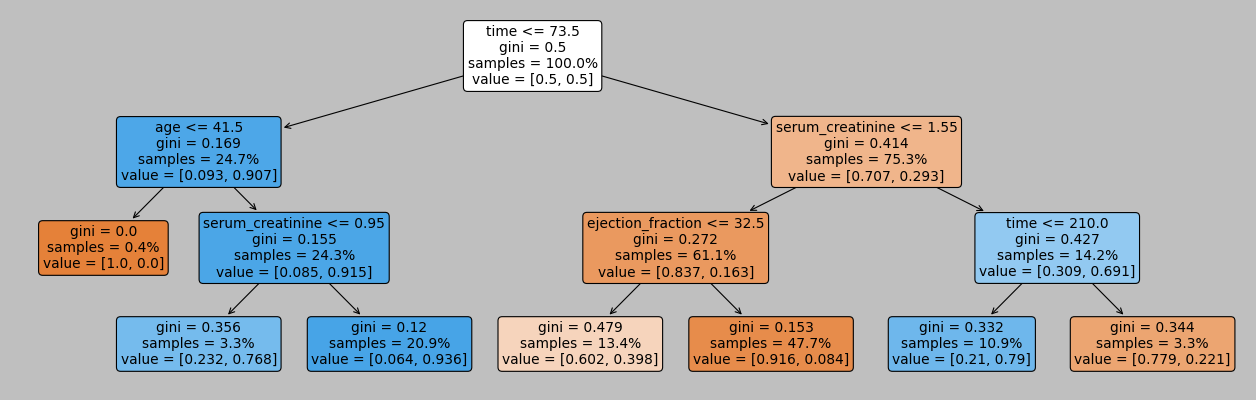

In [38]:
plt.figure(figsize=(20,6))
tree.plot_tree(dtc_cv, filled=True, rounded=True, feature_names=X_train.columns.tolist(), proportion=True);

In [39]:
print('Weighted gini: {:.2f}'.format(0.101*12.6 + 0.329*11.7 + 0.466*7.9 + 0.129*53.1 + 0.415*10.9 + 0.26*3.3))

Weighted gini: 21.03


Even though the metrics for the test set match those obtained with DTC ROC_AUC 2, this Decision Tree exhibits a higher Weighted Gini.

#### Random Forest Classifier
##### RFC recall_micro

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
%%time
rfc = RandomForestClassifier(random_state=0)
params = {'n_estimators':[43,44,45,46,47],
          'max_depth':[3,4,5,6,7], 
          'min_samples_split':[2,3,4,5,6,7,8,9,10], 
          'max_features':['sqrt','log2'], 
          'class_weight':['balanced',None,'balanced_subsample']}
rfc_cv = GridSearchCV(rfc, params, n_jobs=-1, scoring='recall_micro', cv=10).fit(X_train, y_train)

print(rfc_cv.best_params_)
print(20*'=','TRAINING METRICS',20*'=')
rfc_cv = rfc_cv.best_estimator_
y_pred = rfc_cv.predict(X_train)
print(classification_report(y_train, y_pred))
print(20*'=','TESTING METRICS',20*'=')
y_pred_test = rfc_cv.predict(X_test)
print(classification_report(y_test, y_pred_test))

{'class_weight': 'balanced_subsample', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_split': 6, 'n_estimators': 43}
==================== TRAINING METRICS ====================
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       159
           1       0.88      0.95      0.92        80

    accuracy                           0.94       239
   macro avg       0.93      0.94      0.94       239
weighted avg       0.94      0.94      0.94       239

==================== TESTING METRICS ====================
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        44
           1       0.88      0.88      0.88        16

    accuracy                           0.93        60
   macro avg       0.91      0.91      0.91        60
weighted avg       0.93      0.93      0.93        60

CPU times: user 16.8 s, sys: 1.41 s, total: 18.3 s
Wall time: 1min 35s


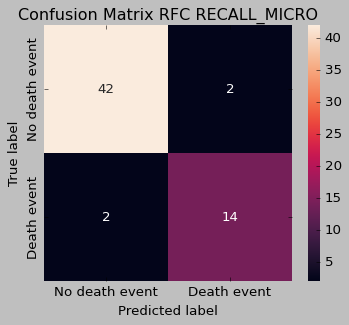

In [42]:
plt.figure(figsize=(5,4))
plt.style.use('classic')
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, yticklabels=['No death event','Death event'], xticklabels=['No death event','Death event'])
plt.xlabel('Predicted label')
plt.ylabel('True label');
plt.title('Confusion Matrix RFC RECALL_MICRO');

In [43]:
pd.DataFrame(zip(X_train.columns, rfc_cv.feature_importances_), columns=['Feature','Importance']).sort_values('Importance', ascending=False)

,Feature,Importance
0,time,0.388738
1,serum_creatinine,0.199761
2,ejection_fraction,0.158125
3,age,0.123974
4,serum_sodium,0.104244
6,anaemia,0.015906
5,high_blood_pressure,0.009253


In this case, an improvement is evident not only in the training metrics but also in the test set. Specifically, there is a 95% precision and recall for 'No death event' data, while 'Death event' data achieve 88% in these same metrics. Consequently, an overall accuracy of 93% is observed.

In terms of the number of features, in contrast to DTC ROC_AUC 2, in RFC Recall_Micro, all variables are important in this model, and their importances are more evenly distributed.

##### RFC ROC_AUC

In [44]:
%%time
rfc = RandomForestClassifier(random_state=0)
params = {'n_estimators':[40,50,60,70,80,90,100,110],
          'max_depth':[3,4,5,6,7,8,9], 
          'min_samples_split':[2,3,4,5,6,7,8,9,10], 
          'max_features':['sqrt','log2',6,7], 
          'class_weight':['balanced_subsample', None, 'balanced']}
rfc_cv = GridSearchCV(rfc, params, n_jobs=-1, scoring='roc_auc', cv=10).fit(X_train, y_train)

print(rfc_cv.best_params_)
print(20*'=','TRAINING METRICS',20*'=')
rfc_cv = rfc_cv.best_estimator_
y_pred = rfc_cv.predict(X_train)
print(classification_report(y_train, y_pred))
print(20*'=','TESTING METRICS',20*'=')
y_pred_test = rfc_cv.predict(X_test)
print(classification_report(y_test, y_pred_test))

{'class_weight': 'balanced_subsample', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_split': 9, 'n_estimators': 60}
==================== TRAINING METRICS ====================
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       159
           1       0.87      0.95      0.91        80

    accuracy                           0.94       239
   macro avg       0.92      0.94      0.93       239
weighted avg       0.94      0.94      0.94       239

==================== TESTING METRICS ====================
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        44
           1       0.78      0.88      0.82        16

    accuracy                           0.90        60
   macro avg       0.87      0.89      0.88        60
weighted avg       0.91      0.90      0.90        60

CPU times: user 1min 32s, sys: 7.12 s, total: 1min 39s
Wall time: 15min


The metrics in this case are perfect (100%) for the training set. However, in the testing set, the metrics are not superior to those of RFC Recall_Micro. This is a case of overfitting, as achieving 100% in the training set results in a significant gap with the test set metrics.

##### RFC f1_micro

In [45]:
%%time
rfc = RandomForestClassifier(random_state=0)
params = {'n_estimators':[40,50,60,70,80,90,100],
          'max_depth':[3,4,5,6,7,8,9,10], 
          'min_samples_split':[2,3,4,5,6,7,8,9,10], 
          'max_features':['sqrt','log2',6,7], 
          'class_weight':['balanced',None,'balanced_subsample']}
rfc_cv = GridSearchCV(rfc, params, n_jobs=-1, scoring='f1_micro', cv=10).fit(X_train, y_train)

print(rfc_cv.best_params_)
print(20*'=','TRAINING METRICS',20*'=')
rfc_cv = rfc_cv.best_estimator_
y_pred = rfc_cv.predict(X_train)
print(classification_report(y_train, y_pred))
print(20*'=','TESTING METRICS',20*'=')
y_pred_test = rfc_cv.predict(X_test)
print(classification_report(y_test, y_pred_test))

{'class_weight': 'balanced', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_split': 7, 'n_estimators': 50}
==================== TRAINING METRICS ====================
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       159
           1       0.87      0.95      0.91        80

    accuracy                           0.94       239
   macro avg       0.92      0.94      0.93       239
weighted avg       0.94      0.94      0.94       239

==================== TESTING METRICS ====================
              precision    recall  f1-score   support

           0       0.95      0.89      0.92        44
           1       0.74      0.88      0.80        16

    accuracy                           0.88        60
   macro avg       0.84      0.88      0.86        60
weighted avg       0.89      0.88      0.89        60

CPU times: user 1min 34s, sys: 6.82 s, total: 1min 41s
Wall time: 14min 12s


This model is worse than the previous one.

### XGBoost
#### XGBoost ROC_AUC

In [46]:
# check xgboost version
import xgboost
from xgboost import XGBClassifier

In [47]:
%%time
xgb = XGBClassifier(eta=0.1, colsample_bytree=0.8, use_label_encoder=False)
params = {'n_estimators':[30,40,50,60,70,80,90,100],
          'max_depth':[3,4,5,6,7,8,9,10], 
          'subsample':[0.8, 0.7]}
xgb_cv = GridSearchCV(xgb, params, n_jobs=-1, scoring='roc_auc', cv=10).fit(X_train, y_train.astype('int8'))
print(xgb_cv.best_params_)
print(20*'=','TRAINING METRICS',20*'=')
xgb_cv = xgb_cv.best_estimator_
y_pred = xgb_cv.predict(X_train)
print(classification_report(y_train, y_pred))
print(20*'=','TESTING METRICS',20*'=')
y_pred_test = xgb_cv.predict(X_test)
print(classification_report(y_test, y_pred_test))

{'max_depth': 9, 'n_estimators': 80, 'subsample': 0.8}
==================== TRAINING METRICS ====================
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       159
           1       0.97      0.97      0.97        80

    accuracy                           0.98       239
   macro avg       0.98      0.98      0.98       239
weighted avg       0.98      0.98      0.98       239

==================== TESTING METRICS ====================
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        44
           1       0.83      0.94      0.88        16

    accuracy                           0.93        60
   macro avg       0.90      0.93      0.92        60
weighted avg       0.94      0.93      0.93        60

CPU times: user 1.27 s, sys: 47.4 ms, total: 1.32 s
Wall time: 3.06 s


In [48]:
%%time
xgb = XGBClassifier(eta=0.1, colsample_bytree=0.8, use_label_encoder=False)
params = {'n_estimators':[30,40,50,60,70,80,90,100],
          'max_depth':[3,4,5,6,7,8,9,10], 
          'subsample':[0.8, 0.7]}
xgb_cv = GridSearchCV(xgb, params, n_jobs=-1, scoring='f1_micro', cv=10).fit(X_train, y_train.astype('int8'))
print(xgb_cv.best_params_)
print(20*'=','TRAINING METRICS',20*'=')
xgb_cv = xgb_cv.best_estimator_
y_pred = xgb_cv.predict(X_train)
print(classification_report(y_train, y_pred))
print(20*'=','TESTING METRICS',20*'=')
y_pred_test = xgb_cv.predict(X_test)
print(classification_report(y_test, y_pred_test))

{'max_depth': 6, 'n_estimators': 40, 'subsample': 0.7}
==================== TRAINING METRICS ====================
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       159
           1       0.94      0.93      0.93        80

    accuracy                           0.95       239
   macro avg       0.95      0.95      0.95       239
weighted avg       0.95      0.95      0.95       239

==================== TESTING METRICS ====================
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        44
           1       0.75      0.94      0.83        16

    accuracy                           0.90        60
   macro avg       0.86      0.91      0.88        60
weighted avg       0.91      0.90      0.90        60

CPU times: user 1.28 s, sys: 50.7 ms, total: 1.33 s
Wall time: 3.1 s


In [49]:
%%time
xgb = XGBClassifier(eta=0.1, colsample_bytree=0.8, use_label_encoder=False)
params = {'n_estimators':[30,40,50,60,70,80,90,100],
          'max_depth':[3,4,5,6,7,8,9,10], 
          'subsample':[0.8, 0.7]}
xgb_cv = GridSearchCV(xgb, params, n_jobs=-1, scoring='balanced_accuracy', cv=10).fit(X_train, y_train.astype('int8'))
print(xgb_cv.best_params_)
print(20*'=','TRAINING METRICS',20*'=')
xgb_cv = xgb_cv.best_estimator_
y_pred = xgb_cv.predict(X_train)
print(classification_report(y_train, y_pred))
print(20*'=','TESTING METRICS',20*'=')
y_pred_test = xgb_cv.predict(X_test)
print(classification_report(y_test, y_pred_test))

{'max_depth': 4, 'n_estimators': 90, 'subsample': 0.7}
==================== TRAINING METRICS ====================
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       159
           1       0.97      0.96      0.97        80

    accuracy                           0.98       239
   macro avg       0.98      0.97      0.98       239
weighted avg       0.98      0.98      0.98       239

==================== TESTING METRICS ====================
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        44
           1       0.83      0.94      0.88        16

    accuracy                           0.93        60
   macro avg       0.90      0.93      0.92        60
weighted avg       0.94      0.93      0.93        60

CPU times: user 1.33 s, sys: 54.5 ms, total: 1.38 s
Wall time: 3.29 s


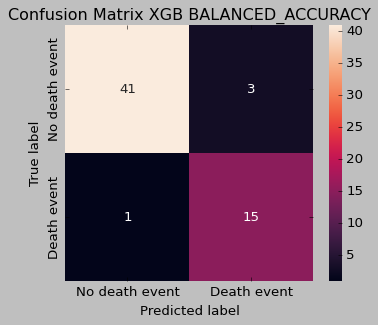

In [50]:
plt.figure(figsize=(5,4))
plt.style.use('classic')
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, yticklabels=['No death event','Death event'], xticklabels=['No death event','Death event'])
plt.xlabel('Predicted label')
plt.ylabel('True label');
plt.title('Confusion Matrix XGB BALANCED_ACCURACY');

In [51]:
pd.DataFrame(dict(zip(X.columns, xgb_cv.feature_importances_)), index=[0]).T.rename(columns={0:'Importance'}).sort_values('Importance', ascending=False)

,Importance
time,0.291493
serum_creatinine,0.184257
ejection_fraction,0.153545
age,0.114534
serum_sodium,0.112821
anaemia,0.078037
high_blood_pressure,0.065314


This model is better than the first XGBoost model because, even when the testing metrics are the same in both models, the first one exhibits a larger gap between the training and testing metrics compared to this model. The smaller the gap, the lower the overfitting.

## CONCLUSIONS
In summary, it is evident from the confusion matrix, recall, and precision metrics that the best models are **RFC RECALL_MICRO** and the **XGB BALANCED_ACCURACY**.

Both models have the same number of false predictions; however, one has 2 False Negatives and 2 False Positives, while the other has only 1 False Negative and 3 False Positives. Therefore, the final decision will depend on the cost of False Positives (FP) and False Negatives (FN).

Under the assumption that FN predictions are considerably worse than FP ones because failing in a death prediction can be logically considered worse, the chosen model should be **XGB BALANCED ACCURACY**.

Another aspect that must be acknowledged is that in both models, the most important features are:


| Feature | RFC RECALL_MICRO | XGB BALANCED_ACCURACY |
| --- | -: | -: |
| time | 0.404599 | 0.291493 |
| serum_creatinine | 0.196797 | 0.184257 |
| ejection_fraction | 0.145162 | 0.153545 |
| age | 0.123660 | 0.114534 |
| serum_sodium | 0.100690 | 0.112821 |
| anaemia | 0.016455 | 0.078037 |
| high_blood_pressure | 0.012637 | 0.065314 |

In conclusion, to keep it concise, based on the available data, the trained model enables the prediction of Heart Failure in individuals using features such as time, serum creatinine, ejection fraction, age, serum sodium, anemia, and high blood pressure. The model achieves an accuracy of 93%, with 94% sensitivity for the most relevant class, which is 'Death event.' As future work, it is proposed to gather more data to test the model on a larger number of individuals and further validate its applicability.